## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

import pandas as pd

mpl.rcParams['font.size'] = 16

# Set seed
np.random.seed(1234)

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

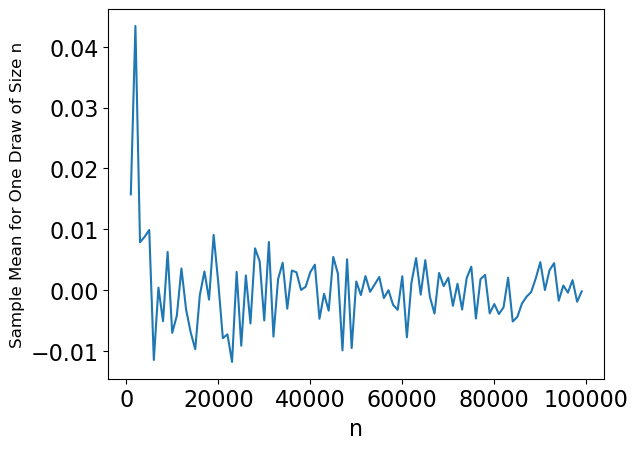

In [2]:
# n to plot
n_all = np.arange(1000, 100_000, 1000)
sample_means = []
# Loop over values of n
for n_val in n_all:
    # Take mean of sim_means and append to mean_sample_means
    sample_means.append(np.mean(np.random.normal(loc=0.0, scale=1.0, size=n_val)))

# Plot n and the sample mean
plt.plot(n_all, sample_means)
plt.xlabel('n')
plt.ylabel('Sample Mean for One Draw of Size n', fontsize=12)
plt.show()

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

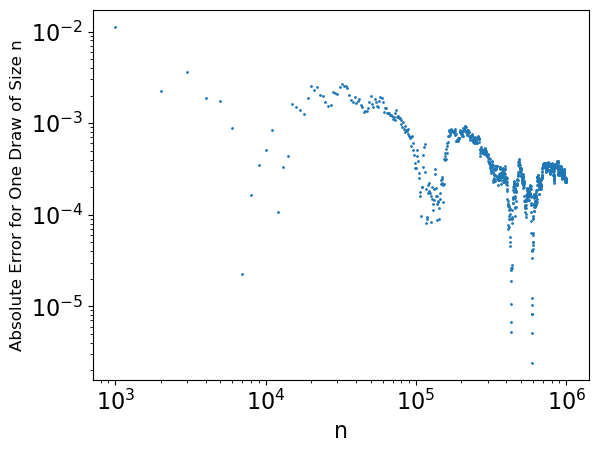

In [3]:
# Create n values useful for the plot x-axis
n_values = np.arange(start = 1000, stop = 1_000_000, step = 1000)
n_max = np.max(n_values)
# A simple choice of beta parameters
beta_a = 1
beta_b = 1
# Big sample matrix
big_sample = np.random.beta(a = beta_a, b = beta_b, size = n_max)

# Create a list to store sample means
sample_mean_for_ns = []
# Loop over values of n
for n_val in n_values:
    # Take mean of sim_means and append to mean_sample_means
    sample_mean_for_ns.append(np.mean(big_sample[:n_val]))

# Calculate the absolute error as difference between the sample mean and the true mean of the beta distribution
abs_error = [np.abs(sample_mean - (beta_a / (beta_a + beta_b))) for sample_mean in sample_mean_for_ns]

# Plot n and the sample mean with log scale
# Create a scatter plot
# Reduce the size of the points
plt.scatter(n_values, abs_error, s=1)
plt.xlabel('n')
plt.xticks(n_values)
plt.ylabel('Absolute Error for One Draw of Size n', fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.show()

**To Discuss:** When doing this calculation, what kind of convergence are we studying? Almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning to the low peaks in the plot? 

Since we are looking at the absolute error, we are studying convergence almost surely (convergence of the sequence of sample means).

As we increase n, the log absolute error does tend to fall. Low peaks occur when the absolute value of the difference between the sample and actual mean approaches zero. In this case, the log we plot goes to negative infinity.

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

In [4]:
# Here I do my calculations on a standard normal distribution

# n to plot
n_to_try = np.arange(1000, 20_000, 1000)
# epsilon to plot
epsilon_to_try = [0.04, 0.02, 0.01]

# Empty dataframe to store results
# prob_est will be an empirical estimation of the probability - the share of times the sample mean is greater than epsilon
results_df = pd.DataFrame(columns=['n', 'epsilon', 'prob_est'])

# Loop over values of n
for n_val in n_to_try:
    # Loop over values of epsilon
    for epsilon_val in epsilon_to_try:
        # Loop over 5000 draws of the sample mean
        sample_means = []
        for _ in range(5000):
            # Compute gaussian draw sample mean
            sample_means.append(np.mean(np.random.normal(loc=0.0, scale=1.0, size=n_val)))
        # Probability estimate as share of sample means with absolute value greater than epsilon
        prob_est = len([sample_mean for sample_mean in sample_means if np.abs(sample_mean) > epsilon_val]) / len(sample_means)
        # Concatenate to dataframe
        results_df = pd.concat([results_df, pd.DataFrame({'n': [n_val], 'epsilon': [epsilon_val], 'prob_est': [prob_est]})])

C:\Users\ijyli\AppData\Local\Temp\ipykernel_5928\26271214.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'n': [n_val], 'epsilon': [epsilon_val], 'prob_est': [prob_est]})])


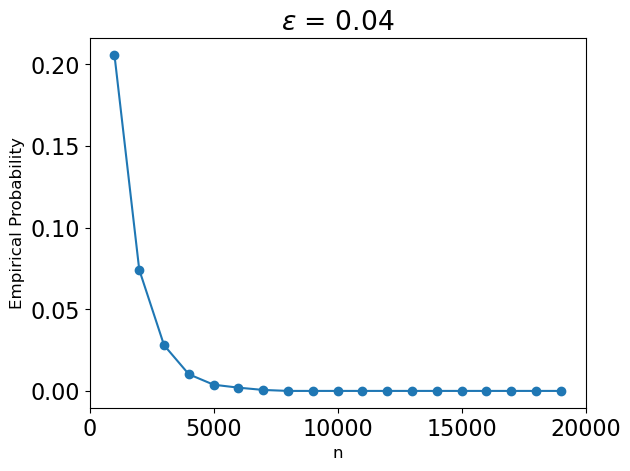

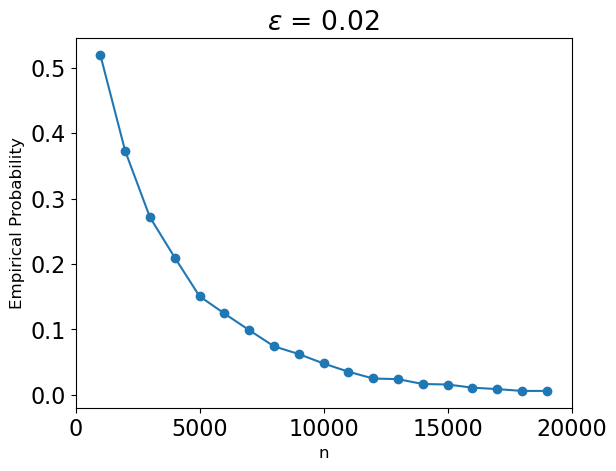

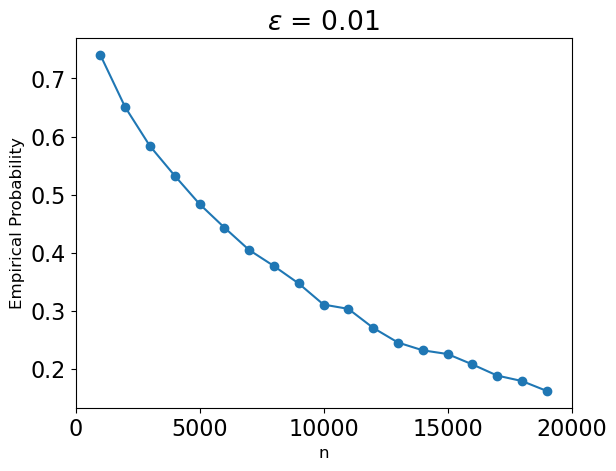

In [5]:
# Plot the results for each epsilon
for epsilon_val in epsilon_to_try:
    # Get n values for epsilon
    n_vals = np.array(results_df[results_df['epsilon'] == epsilon_val]['n'])
    # Get probability estimates for epsilon
    prob_est_vals = np.array(results_df[results_df['epsilon'] == epsilon_val]['prob_est'])
    # Plot
    plt.plot(n_vals, prob_est_vals, 'o-', label=f'epsilon = {epsilon_val}')
    # X-values of 0, 5000, 10000, 15000, 20000
    plt.xticks(np.arange(0, 25_000, 5000))
    # Y-axis label of empirical probability
    plt.ylabel('Empirical Probability', fontsize=12)
    # X-axis label of n
    plt.xlabel('n', fontsize=12)
    # Title of plot
    plt.title('$\epsilon$ = ' + str(epsilon_val))
    plt.show()

We can see that for each our epsilons, the probability of the absolute value of the sample mean being larger than epsilon decreases as n increases.

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtained using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

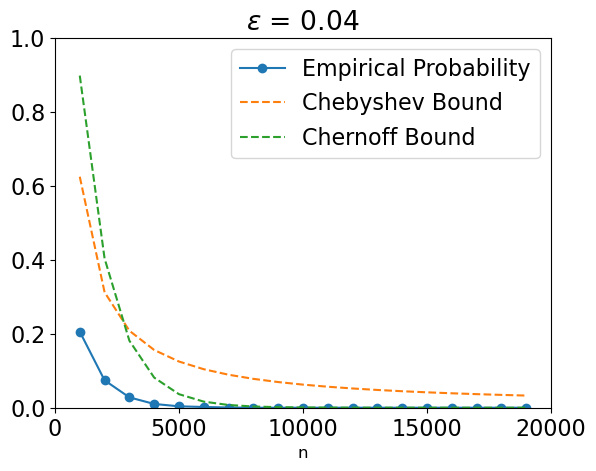

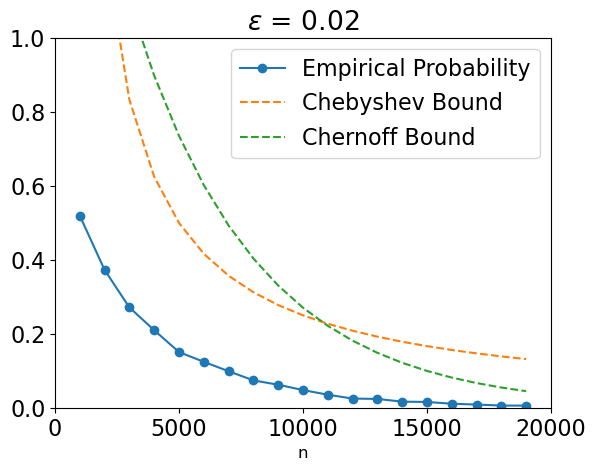

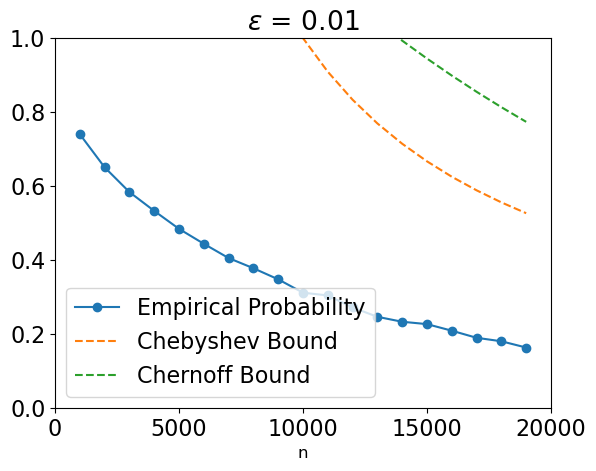

In [6]:
# Plot the results for each epsilon from our standard normal
for epsilon_val in epsilon_to_try:
    # Get n_values for epsilon
    n_vals = np.array(results_df[results_df['epsilon'] == epsilon_val]['n'])
    # Get probability estimates for epsilon
    prob_est_vals = np.array(results_df[results_df['epsilon'] == epsilon_val]['prob_est'])
    # Plot empirical probability
    plt.plot(n_vals, prob_est_vals, 'o-', label=f'Empirical Probability')
    # Plot Chebyshev bound
    plt.plot(n_vals, (np.reciprocal(np.multiply(n_vals, (epsilon_val ** 2)))), linestyle='dashed', label=f'Chebyshev Bound')
    # Plot Chernov bound
    # Annoying fix: https://stackoverflow.com/questions/47966728/how-to-fix-float-object-has-no-attribute-exp
    plt.plot(n_vals, (2 * np.exp((np.multiply(n_vals, (- (1 / 2)) * (epsilon_val ** 2))).astype(float))), linestyle='dashed', label=f'Chernoff Bound')
    # X-values of 0, 5000, 10000, 15000, 20000
    plt.xticks(np.arange(0, 25_000, 5000))
    # Limit y axis to 0, 1
    plt.ylim(0, 1)
    # X-axis label of n
    plt.xlabel('n', fontsize=12)
    # Title of plot
    plt.title('$\epsilon$ = ' + str(epsilon_val))
    # Legend
    plt.legend()
    # X-axis label of n
    plt.show()
    # Close plot
    plt.close()

### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. 

If we call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{(\bar X_n - \mu)}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is what the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

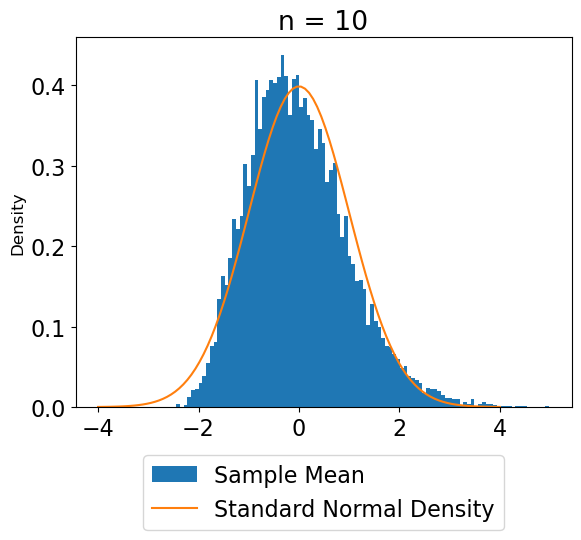

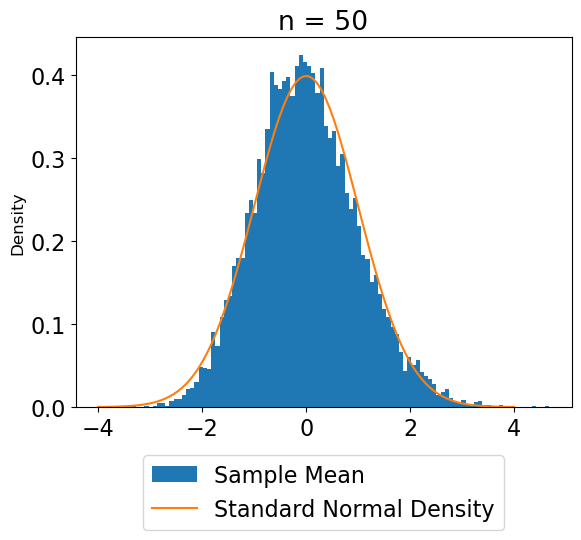

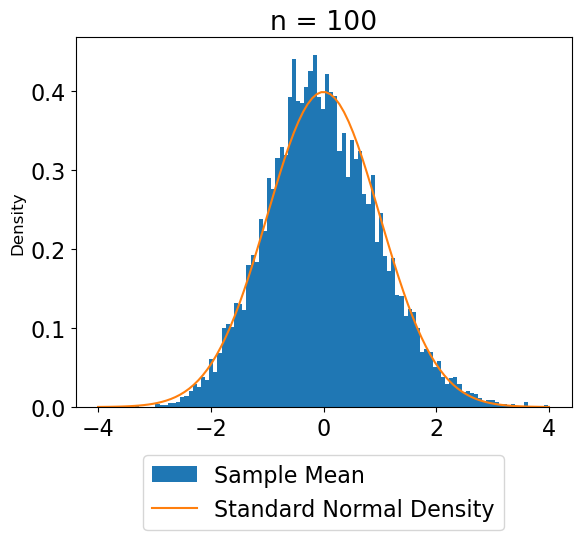

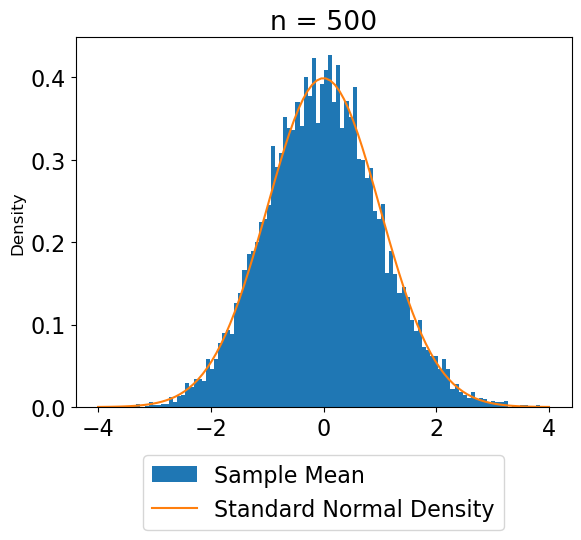

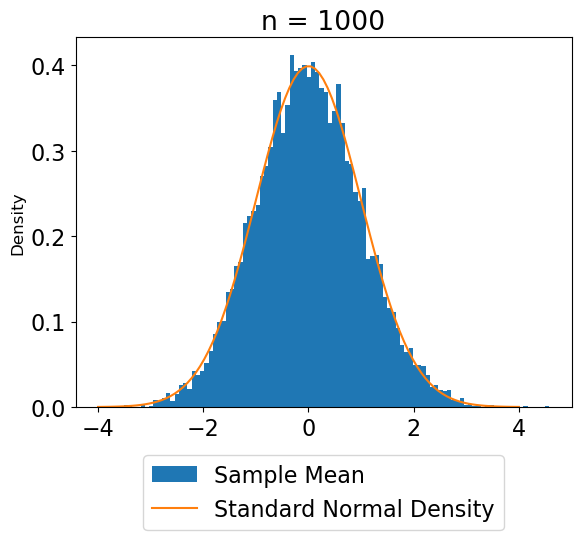

In [7]:
# Let's look at an exponential distribution with lambda = 5

# n to plot
n_to_try = [10, 50, 100, 500, 1000]

# Exponential lambda
expo_lambda = 5

# Loop over n and plot a histogram demonstrating the central limit theorem
# Overlay a standard normal density
for n_val in n_to_try:
    # Do 10_000 draws of the sample and its mean
    # Storing statistics in a list
    statistics = []
    for _ in range(10_000):
        # Take a sample of size n_val
        # For numpy, we need to flip the lambda parameter
        sample = np.random.exponential(scale = 1/expo_lambda, size=n_val)
        # Calculate statistic in the CLT
        # Mean is 1/lambda, variance is 1/lambda^2
        statistics.append(np.sqrt(n_val) * ((np.mean(sample) - (1 / expo_lambda)) / np.sqrt(1 / (expo_lambda ** 2))))
    # Plot histogram
    plt.hist(statistics, density=True, label='Sample Mean', bins = 100)
    # Plot standard normal density
    plt.plot(np.linspace(-4, 4, 100), stats.norm.pdf(np.linspace(-4, 4, 100)), label='Standard Normal Density')
    # Y-axis label of density
    plt.ylabel('Density', fontsize=12)
    # Title of plot
    plt.title('n = ' + str(n_val))
    # Legend centered below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
    # Show plot
    plt.show()

As n increases, the appropriate transformation of the exponential distribution for the CLT begins to resemble the standard normal distribution.

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


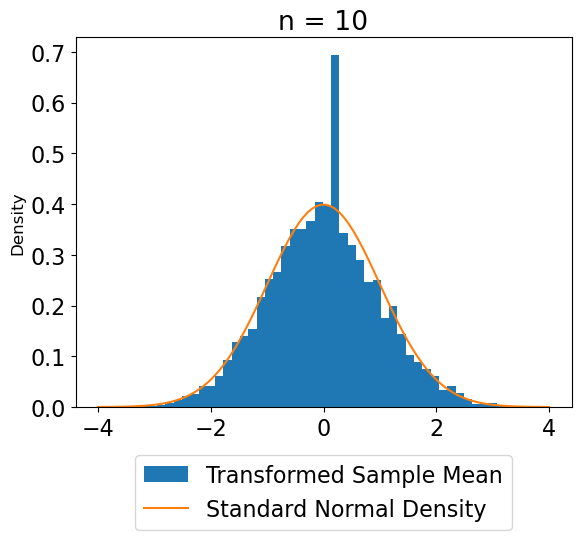

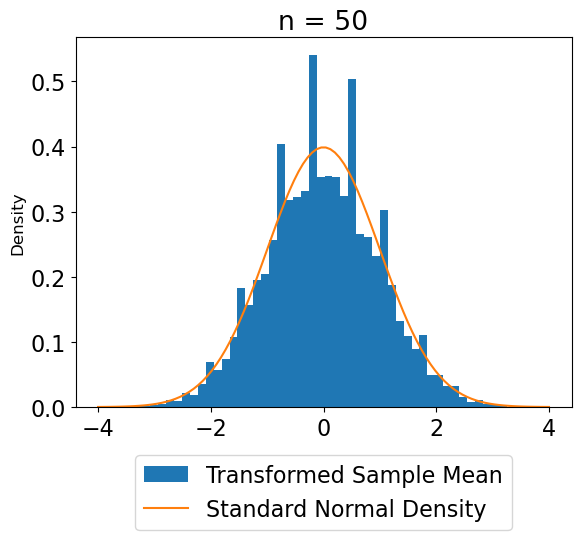

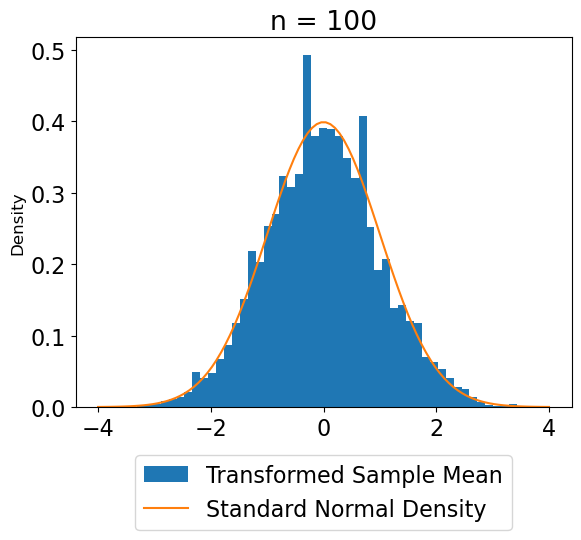

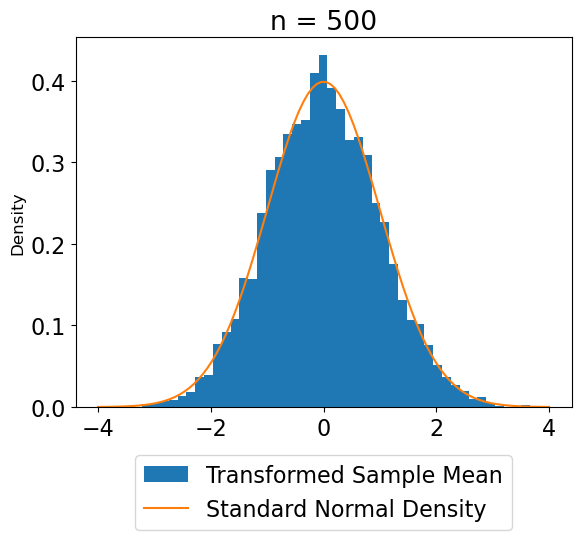

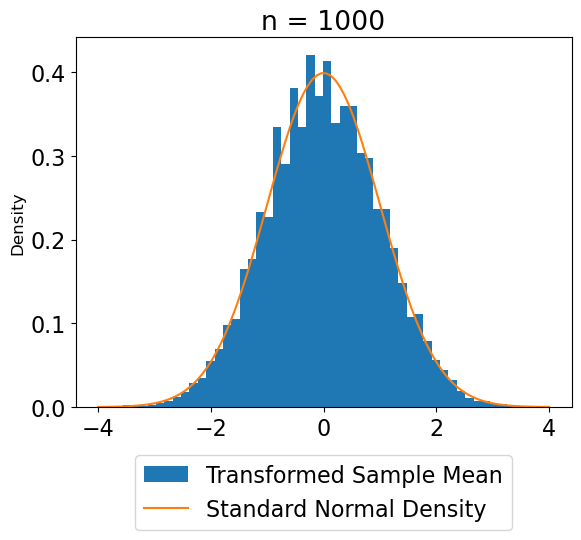

In [8]:
# Let's do a Poisson random variable with lambda = 5

# n to plot
n_to_try = [10, 50, 100, 500, 1000]

# Poisson lambda
poisson_lambda = 5

# Loop over n and plot a histogram demonstrating the central limit theorem
# Overlay a standard normal density
for n_val in n_to_try:
    # Do 10_000 draws of the sample and its mean
    # Storing statistics in a list
    statistics = []
    for _ in range(10_000):
        # Take a sample of size n_val
        sample = np.random.poisson(lam = poisson_lambda, size=n_val)
        # Calculate statistic in the CLT
        # Poisson has mean lambda and variance lambda
        statistics.append(np.sqrt(n_val) * ((np.mean(sample) - poisson_lambda) / np.sqrt(poisson_lambda)))
    # Plot histogram
    # We need a lot of bins for the discrete distribution
    plt.hist(statistics, density=True, label='Transformed Sample Mean', bins = 50)
    # Plot standard normal density
    plt.plot(np.linspace(-4, 4, 100), stats.norm.pdf(np.linspace(-4, 4, 100)), label='Standard Normal Density')
    # Y-axis label of density
    plt.ylabel('Density', fontsize=12)
    # Title of plot
    plt.title('n = ' + str(n_val))
    # Legend centered below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
    # Show plot
    plt.show()

As n increases, the appropriate transformation of the Poisson distribution for the CLT begins to resemble the standard normal distribution.

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the following reading about stable distributions: [Wikipedia](https://en.wikipedia.org/wiki/Stable_distribution).

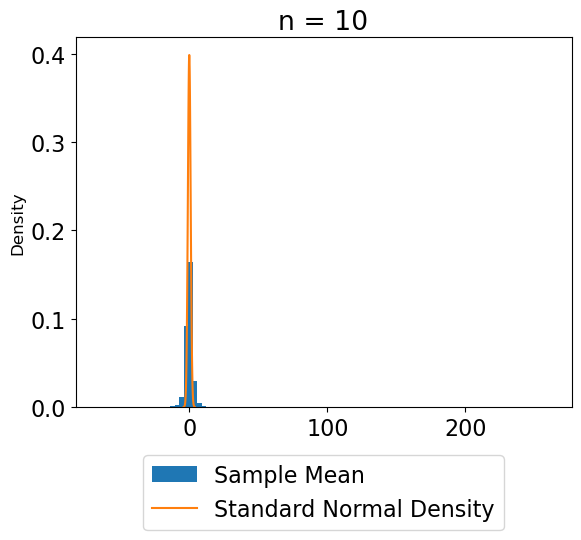

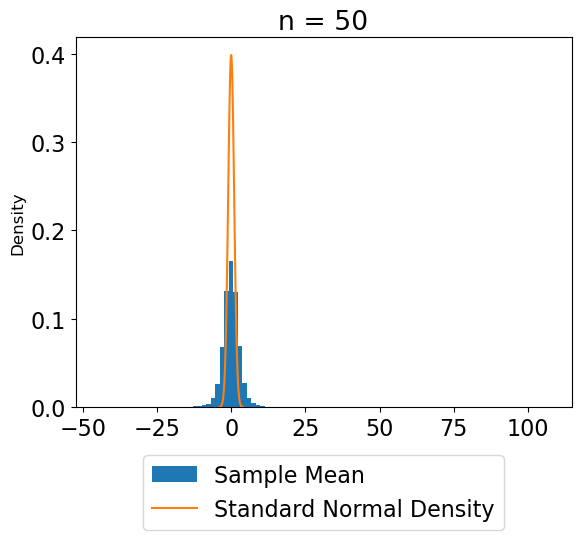

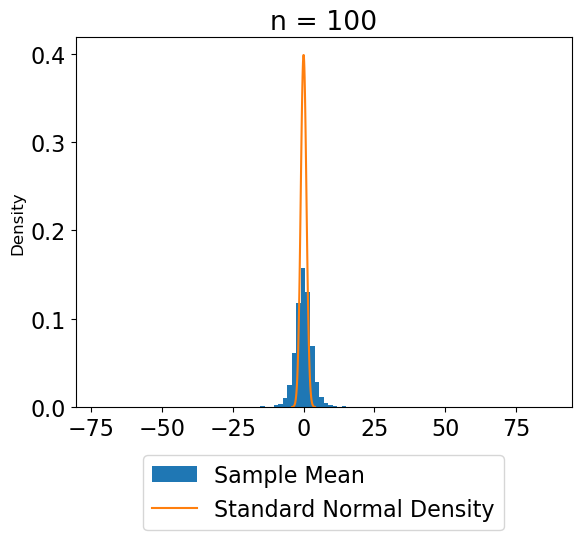

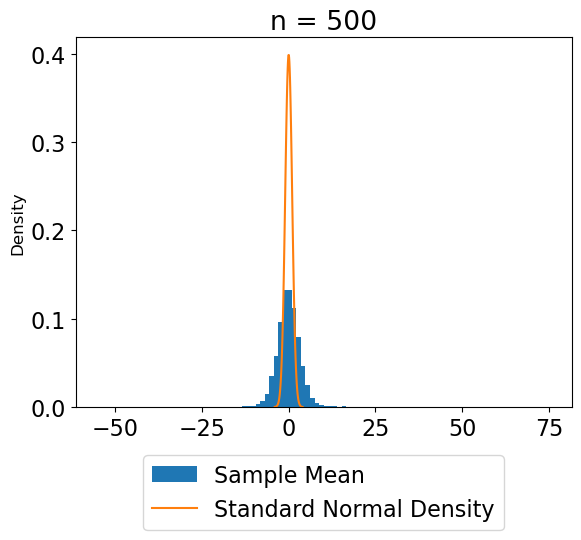

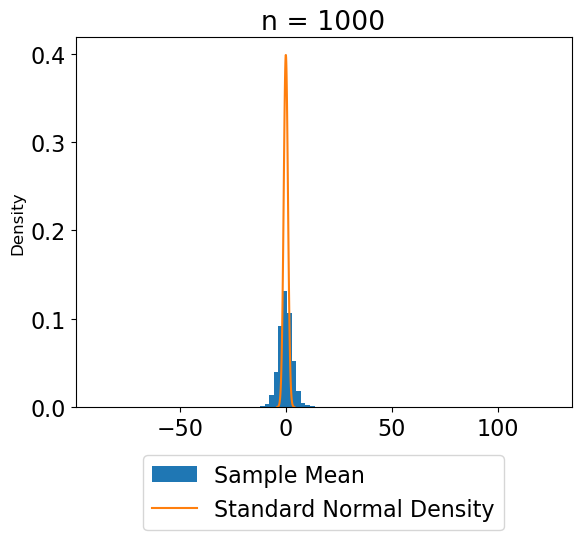

In [10]:
# We can look at the t distribution with 2 degrees of freedom

# n to plot
n_to_try = [10, 50, 100, 500, 1000]

# Loop over n and plot a histogram of the sample mean
# Overlay a standard normal density
for n_val in n_to_try:
    # Do 10_000 draws of the sample and its mean
    # Storing statistics in a list
    statistics = []
    for _ in range(10_000):
        # Take a sample of size n_val
        sample = np.random.standard_t(df=2, size=n_val)
        # We'll just plot the straight sample mean times sqrt(n). Note the t-distribution has mean 0
        statistics.append(np.sqrt(n_val) * np.mean(sample))
    # Plot histogram
    plt.hist(statistics, density=True, label='Scaled Sample Mean', bins = 100)
    # Plot standard normal density
    plt.plot(np.linspace(-4, 4, 100), stats.norm.pdf(np.linspace(-4, 4, 100)), label='Standard Normal Density')
    # Y-axis label of density
    plt.ylabel('Density', fontsize=12)
    # Title of plot
    plt.title('n = ' + str(n_val))
    # Legend centered below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
    # Show plot
    plt.show()

The t-distribution has very fat tails, so it isn't surprising that the scaled sample mean takes on such extreme values even as n increases.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Isaac Liu (ijyliu)
- Member No2: Soren Rajani (SorenRajani)
- Member No3: